<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    46.791228  99.076661  41.836460 -0.065424  197.638926   
      1.0    50.865957  29.156174  85.806466  0.570105  176.398702   
      2.0    53.241453  79.271011  58.287223  0.012398  200.812085   
      3.0    44.023871  29.059533  83.136568 -0.776558  165.443415   
      4.0    84.337116  32.041489  65.096780  0.321248  191.796633   
...                ...        ...        ...       ...         ...   
999.0 115.0  29.398461  57.082024  32.339558 -0.040929  128.779113   
      116.0  48.696410  63.064864  38.042694 -0.271522  159.532445   
      117.0  49.277983  88.902592  67.228881  0.680895  216.090351   
      118.0  28.408715  73.675396  95.544492  0.317518  207.946122   
      119.0  63.878747  21.259397  29.022068 -0.100532  124.059680   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    197.800222 -0.161296  
      1.0    175.715437  0.683265  
      2.0    200.834005 -0.021921  
      3.0    166.104022 -0.660608  
      4.0    191.456514  0.340120  
...                 ...       ...  
999.0 115.0  128.790072 -0.010959  
      116.0  159.804687 -0.272242  
      117.0  215.375183  0.715168  
      118.0  207.586590  0.359531  
      119.0  124.261804 -0.202124  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    46.791228  99.076661  41.836460 -0.065424  197.638926   
      1.0    50.865957  29.156174  85.806466  0.570105  176.398702   
      2.0    53.241453  79.271011  58.287223  0.012398  200.812085   
      3.0    44.023871  29.059533  83.136568 -0.776558  165.443415   
      4.0    84.337116  32.041489  65.096780  0.321248  191.796633   
...                ...        ...        ...       ...         ...   
999.0 115.0  29.398461  57.082024  32.339558 -0.040929  128.779113   
      116.0  48.696410  63.064864  38.042694 -0.271522  159.532445   
      117.0  49.277983  88.902592  67.228881  0.680895  216.090351   
      118.0  28.408715  73.675396  95.544492  0.317518  207.946122   
      119.0  63.878747  21.259397  29.022068 -0.100532  124.059680   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    197.800222 -0.161296  
      1.0    175.715437  0.683265  
      2.0    200.834005 -0.021921  
      3.0    166.104022 -0.660608  
      4.0    191.456514  0.340120  
...                 ...       ...  
999.0 115.0  128.790072 -0.010959  
      116.0  159.804687 -0.272242  
      117.0  215.375183  0.715168  
      118.0  207.586590  0.359531  
      119.0  124.261804 -0.202124  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,46.791228,99.076661,41.836460,-0.065424,197.638926,197.800222,-0.161296
1,0.0,1.0,50.865957,29.156174,85.806466,0.570105,176.398702,175.715437,0.683265
2,0.0,2.0,53.241453,79.271011,58.287223,0.012398,200.812085,200.834005,-0.021921
3,0.0,3.0,44.023871,29.059533,83.136568,-0.776558,165.443415,166.104022,-0.660608
4,0.0,4.0,84.337116,32.041489,65.096780,0.321248,191.796633,191.456514,0.340120
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,29.398461,57.082024,32.339558,-0.040929,128.779113,128.790072,-0.010959
119996,999.0,116.0,48.696410,63.064864,38.042694,-0.271522,159.532445,159.804687,-0.272242
119997,999.0,117.0,49.277983,88.902592,67.228881,0.680895,216.090351,215.375183,0.715168
119998,999.0,118.0,28.408715,73.675396,95.544492,0.317518,207.946122,207.586590,0.359531


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    46.791228  99.076661  41.836460 -0.065424  197.638926   
      1.0    50.865957  29.156174  85.806466  0.570105  176.398702   
      2.0    53.241453  79.271011  58.287223  0.012398  200.812085   
      3.0    44.023871  29.059533  83.136568 -0.776558  165.443415   
      4.0    84.337116  32.041489  65.096780  0.321248  191.796633   
...                ...        ...        ...       ...         ...   
999.0 115.0  29.398461  57.082024  32.339558 -0.040929  128.779113   
      116.0  48.696410  63.064864  38.042694 -0.271522  159.532445   
      117.0  49.277983  88.902592  67.228881  0.680895  216.090351   
      118.0  28.408715  73.675396  95.544492  0.317518  207.946122   
      119.0  63.878747  21.259397  29.022068 -0.100532  124.059680   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    197.800222 -0.161296  
      1.0    175.715437  0.683265  
      2.0    200.834005 -0.021921  
      3.0    166.104022 -0.660608  
      4.0    191.456514  0.340120  
...                 ...       ...  
999.0 115.0  128.790072 -0.010959  
      116.0  159.804687 -0.272242  
      117.0  215.375183  0.715168  
      118.0  207.586590  0.359531  
      119.0  124.261804 -0.202124  

[120000 rows x 7 columns]

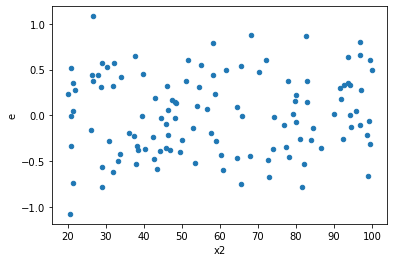

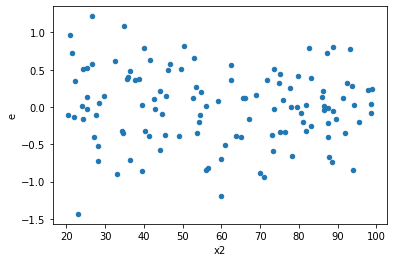

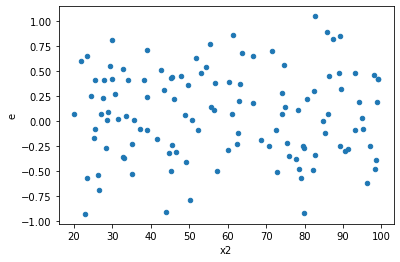

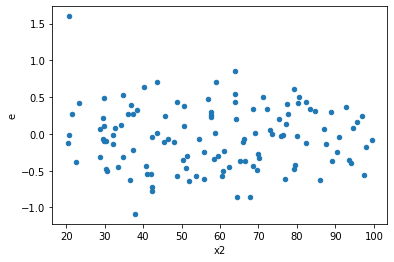

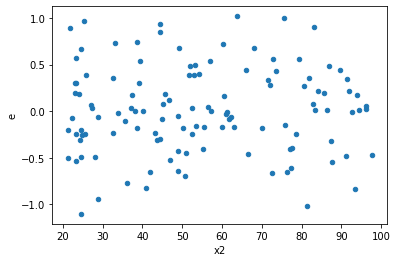

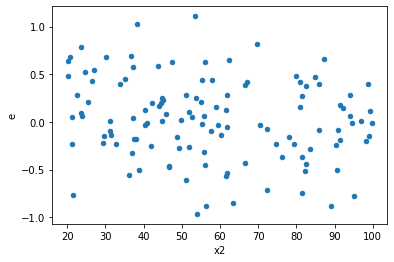

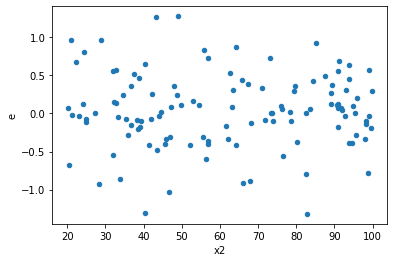

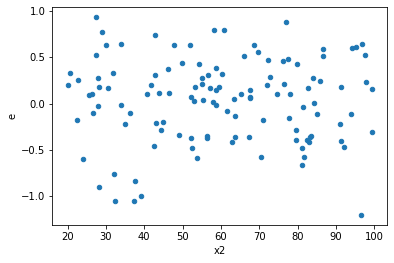

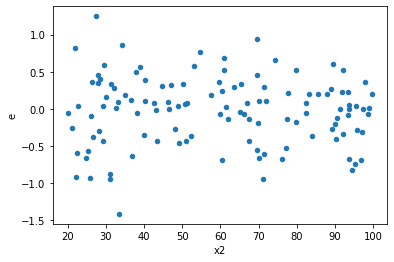

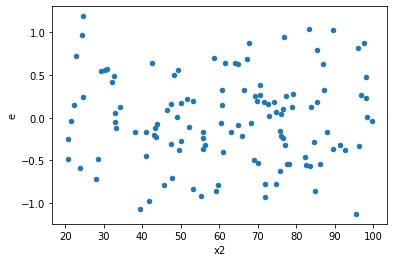

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,45.0,45.0,9.532979691214944,11.465209393123299,0.21184399313810987,0.25478243095829556,1.2026889560762402,0.5384426404987177,0.7307786797506411,0.26922132024935885,Reject001=1 : Homoscedasticity
14.0,45.0,45.0,9.429829768957422,11.55536366481584,0.20955177264349828,0.25678585921812974,1.2254053305241606,0.4981281256387724,0.7509359371806138,0.2490640628193862,Reject001=1 : Homoscedasticity
22.0,45.0,45.0,10.333896103147005,11.680013888576545,0.229642135625489,0.2595558641905899,1.1302623688097275,0.683048213838692,0.658475893080654,0.341524106919346,Reject001=1 : Homoscedasticity
32.0,45.0,45.0,6.681058083513985,8.376169179220245,0.14846795741142188,0.186137092871561,1.2537189580628068,0.4512020719616565,0.7743989640191717,0.22560103598082826,Reject001=1 : Homoscedasticity
34.0,45.0,45.0,5.121328416295814,7.037254464663922,0.11380729813990698,0.15638343254808718,1.3741072418382165,0.29012960657072995,0.854935196714635,0.14506480328536497,Reject001=1 : Homoscedasticity
37.0,45.0,45.0,7.7448823815985985,8.750156868750441,0.17210849736885775,0.19444793041667646,1.1297985479470052,0.6840525531128607,0.6579737234435696,0.34202627655643036,Reject001=1 : Homoscedasticity
40.0,45.0,45.0,5.900724309094041,7.207435964107686,0.13112720686875648,0.16016524364683749,1.2214493656312286,0.5049767768749864,0.7475116115625068,0.2524883884374932,Reject001=1 : Homoscedasticity
42.0,45.0,45.0,8.86207747715994,10.403450063973196,0.19693505504799866,0.23118777919940436,1.1739290353515648,0.5929353091771965,0.7035323454114017,0.29646765458859825,Reject001=1 : Homoscedasticity
43.0,45.0,45.0,4.748008141150322,8.669491565233391,0.10551129202556271,0.19265536811629758,1.8259217986793495,0.04620833001063618,0.9768958349946819,0.02310416500531809,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,8.540324163660042,7.222101126314774,0.1897849814146676,0.1604911361403283,0.845647189487907,0.5762400894316091,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,13.644490561387101,7.729000698155203,0.3032109013641578,0.17175557107011563,0.5664557913234008,0.05965928134922209,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,9.653009051981204,6.838751496560329,0.21451131226624898,0.1519722554791184,0.708458000995734,0.251453834744702,Reject001=1 : Homoscedasticity
3.0,45.0,45.0,8.707205576155058,7.343284890887761,0.1934934572478902,0.16318410868639469,0.8433572432236544,0.5700935415003637,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,10.4283811714856,9.57744511502316,0.23174180381079112,0.21283211366718133,0.9184019031842486,0.7765042026208812,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,8.843474131878953,5.221329897192457,0.19652164737508784,0.1160295532709435,0.5904161440774287,0.0805292015609238,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,9.532979691214944,11.465209393123299,0.21184399313810987,0.25478243095829556,1.2026889560762402,0.5384426404987177,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,9.49667148393678,8.60214533251298,0.211037144087484,0.19115878516695514,0.9058063498419576,0.7414639058571623,Reject001=1 : Homoscedasticity
8.0,45.0,45.0,13.939120883150125,6.418737254005707,0.30975824184778056,0.14263860564457126,0.46048364942187986,0.010605219571947624,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      962
Reject001=0 : Heteroscedasticity     38
Name: Result_test, dtype: int64